# Pytorch_6_Proste sieci neuronowe_torch.nn.Linear

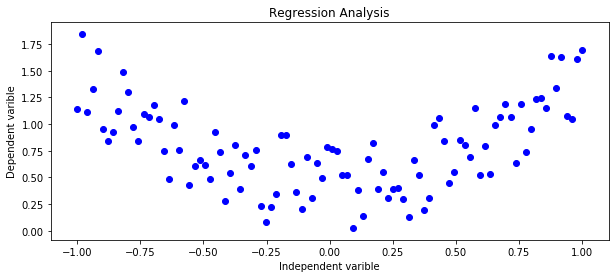

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.9 * torch.rand(x.size())

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()


### Definicje

In [2]:
x.requires_grad = True
# this is where problem occurs
y.requires_grad = True

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

### Definicja sieci, optymalizatora i błędu

In [3]:
net = Net(1, 10, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.07)
criterion = torch.nn.MSELoss()

### Szkolenie modelu

In [4]:
for t in range(200):
    y_pred = net(x)

    loss= criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    print("Epoch {}: {}".format(t, loss))
    optimizer.step()

Epoch 0: 0.8728331923484802
Epoch 1: 0.294999361038208
Epoch 2: 0.16494497656822205
Epoch 3: 0.1310226023197174
Epoch 4: 0.12006892263889313
Epoch 5: 0.11488894373178482
Epoch 6: 0.11138291656970978
Epoch 7: 0.10852637141942978
Epoch 8: 0.10604104399681091
Epoch 9: 0.1038217544555664
Epoch 10: 0.10182240605354309
Epoch 11: 0.10003351420164108
Epoch 12: 0.09843005239963531
Epoch 13: 0.09698805958032608
Epoch 14: 0.09568199515342712
Epoch 15: 0.0944897010922432
Epoch 16: 0.09339428693056107
Epoch 17: 0.09238561987876892
Epoch 18: 0.09144828468561172
Epoch 19: 0.09057894349098206
Epoch 20: 0.08976662904024124
Epoch 21: 0.08901143074035645
Epoch 22: 0.0883021131157875
Epoch 23: 0.08762792497873306
Epoch 24: 0.0869823545217514
Epoch 25: 0.0863686054944992
Epoch 26: 0.08578303456306458
Epoch 27: 0.08522403985261917
Epoch 28: 0.08468931913375854
Epoch 29: 0.08417238295078278
Epoch 30: 0.08366844058036804
Epoch 31: 0.08318108320236206
Epoch 32: 0.08270883560180664
Epoch 33: 0.0822528675198555


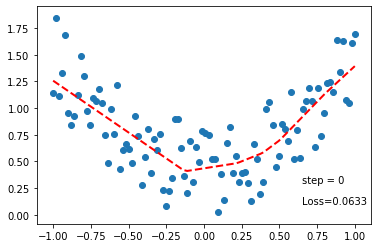

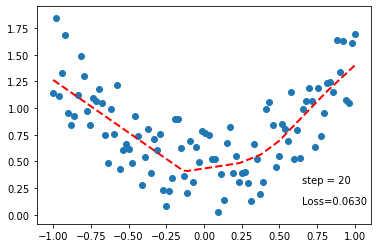

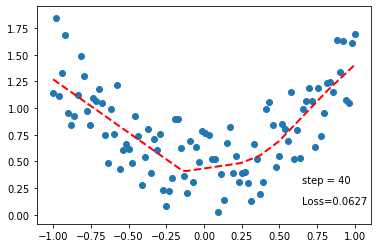

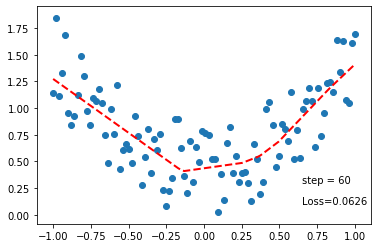

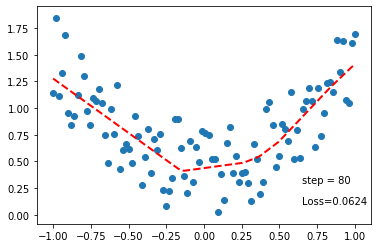

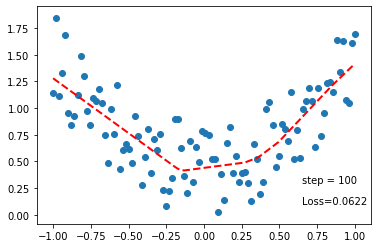

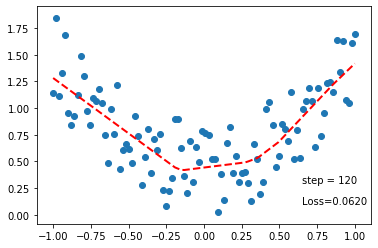

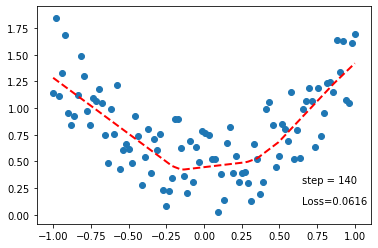

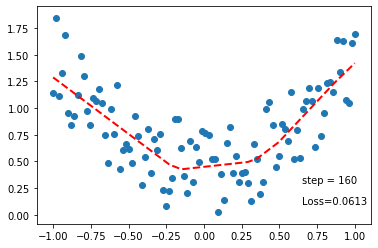

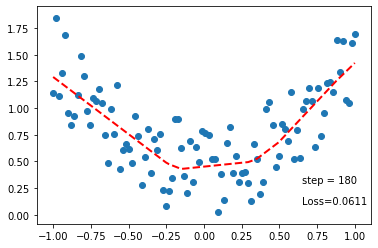

In [5]:
for t in range(200):
    y_pred = net(x)

    loss= criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    #print("Epoch {}: {}".format(t, loss))
    optimizer.step()
    
    if t % 20 == 0:                             #3. Pokazuje naukę co 100 kroków
           # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r--', lw=2)
        plt.text(0.65, 0.1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'black'})
        plt.text(0.65, 0.3, 'step = %d' % t, fontdict={'size': 10, 'color':  'black'})
        plt.pause(0.1)

plt.show()